In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import mean_absolute_error as mae 


In [3]:
statPath = "statistics/regression"
testStatPath = f"{statPath}/test_stats_for_homoLumoGap.csv"
trainingStatPath = f"{statPath}/training_stats_for_homoLumoGap.csv"
validationStatPath = f"{statPath}/validation_stats_for_homoLumoGap.csv"
testDataPath = "testSet(800).csv"


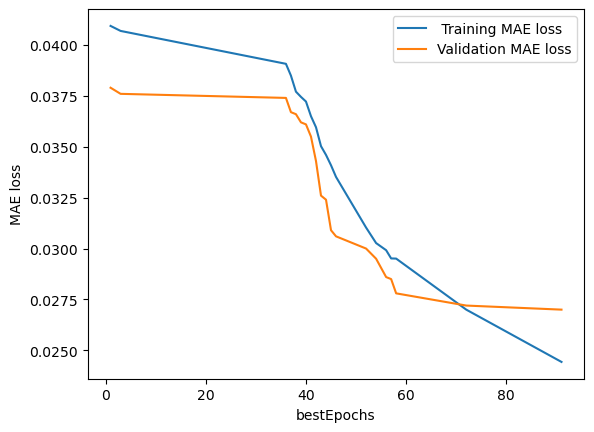

In [8]:
with open(trainingStatPath) as trainingData: 
    trainingDataFrame = pd.read_csv(trainingData)
    validationLoss = trainingDataFrame['validation mae loss'].to_numpy()
    validationLossNum = []
    trainingLossNum = []
    bestEpochNum = []
    for i in range(len(validationLoss)):
        value = float(validationLoss[i].split()[0].partition("(")[2].replace(",",""))
        validationLossNum.append(value)
    trainingLossNum = trainingDataFrame['training mae loss'].to_numpy()
    bestEpochNum = trainingDataFrame['best_epoch'].to_numpy()
    
    plt.plot(bestEpochNum,trainingLossNum, label = " Training MAE loss")
    plt.plot(bestEpochNum,validationLossNum, label = "Validation MAE loss")
    plt.xlabel('bestEpochs')
    plt.ylabel('MAE loss')
    plt.legend()
    plt.show()


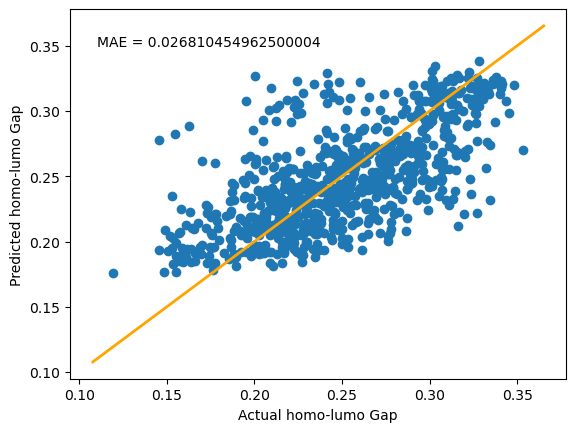

In [44]:
with open(testStatPath) as testPrediction, open(testDataPath) as testActual:
    testPrediction, testActual = pd.read_csv(testPrediction), pd.read_csv(testActual)
    
    predictionData = testPrediction['homoLumoGap'].to_numpy()
    actualData = testActual['homoLumoGap'].to_numpy()
    
    avp = plt.scatter(actualData, predictionData)
    plt.xlabel("Actual homo-lumo Gap")
    plt.ylabel("Predicted homo-lumo Gap")
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='-', color='orange', lw=2, scalex=False, scaley=False)
    meanAbsoluteError = mae(actualData,predictionData)
    plt.text(0.11,0.35,f"MAE = {str(meanAbsoluteError)}")
    plt.autoscale()
    plt.show()
    
    

### Average Error on Test Set

The mae error achieved on test set for predicting homoLumoGap is 0.02681045501479507

### Hyperparameters

- batchSize = 8
- maxLength = 512
- learningRate = 1E-4
- dropRate = 0.5
- epochs = 200
- warmupSteps = 10
- #preprocessingStrategy = config.get('preprocessing_strategy')
- tokenizerName = 't5_tokenizer'
- pooling = 'cls'
- schedulerType = 'onecycle'
- normalizerType = 'z_norm'
- property = "homoLumoGap"
- optimizerType = "adamw"
- taskName = "regression"

- trainingDataSize = 5000
- validationDataSize = 200
- testDataSize = 800

### Other info

Trained on one RTX 2080. Training time was approximately 5 hours
